In [128]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe
%matplotlib inline
from matplotlib.pyplot import figure

### AR(1) model

[5.263157894736843, 4.736842105263159, 4.263157894736843, 3.8368421052631594, 3.4531578947368433, 3.1078421052631593, 2.797057894736843, 2.517352105263159, 2.2656168947368434, 2.0390552052631588, 1.8351496847368431, 1.6516347162631586, 1.486471244636843, 1.3378241201731587, 1.204041708155843, 1.0836375373402585, 0.9752737836062327, 0.8777464052456095, 0.7899717647210486, 0.7109745882489438, 0.6398771294240494, 0.5758894164816445, 0.5183004748334801, 0.46647042735013206, 0.4198233846151188, 0.377841046153607]


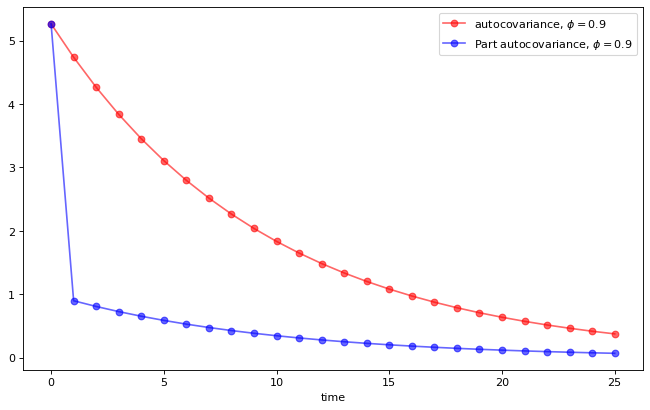

In [129]:
##AR(1)
figure(figsize=(10, 6), dpi=80)
ϕ=0.9
times = list(range(26))
acov = [ϕ**k / (1 - ϕ**2) for k in times]
print(acov)
plt.plot(times, acov, 'ro-', alpha=0.6,label=f'autocovariance, $\phi = {ϕ:.2}$')
for j in range(1,26):
    acov[j]=acov[j]/acov[0]
    
plt.plot(times, acov, 'bo-', alpha=0.6,label=f'Part autocovariance, $\phi = {ϕ:.2}$')
plt.legend(loc='upper right')
plt.xlabel("time")
    
plt.show()


### ARMA(p,q) model

In [130]:
def plot_autocovariance(arma, ax=None):
    if ax is None:
        ax = plt.gca()
    acov = arma.autocovariance()
    ax.stem(list(range(len(acov))), acov)
    ax.set(xlim=(-0.5, len(acov) - 0.5), title='Autocovariance',
           xlabel='time', ylabel='autocovariance')
    return ax

def plot_simulation(arma, ax=None):
    if ax is None:
        ax = plt.gca()
    x_out = arma.simulation()
    ax.plot(x_out)
    ax.set(title='Sample path', xlabel='time', ylabel='state space')
    return ax

def quad_plot(arma):
    num_rows, num_cols = 2, 1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 7))
    plot_functions = [plot_autocovariance,
                      plot_simulation]
    for plot_func, ax in zip(plot_functions, axes.flatten()):
        plot_func(arma, ax)
    plt.tight_layout()
    plt.show()

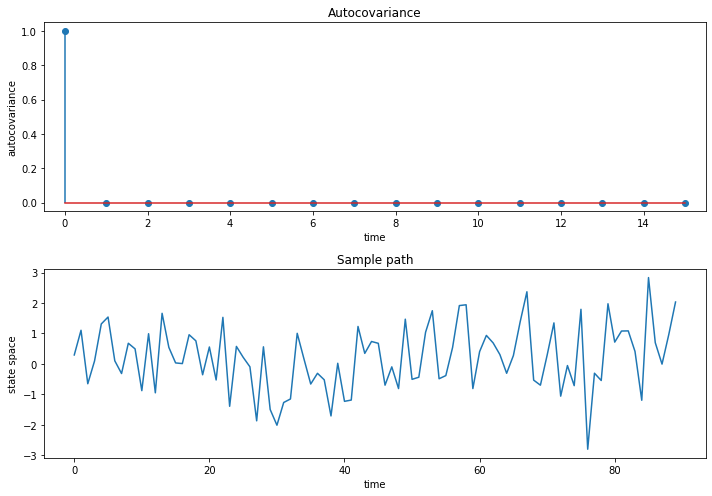

In [132]:
ϕ = 0.0
θ = 0.0
arma = qe.ARMA(ϕ, θ)
quad_plot(arma)

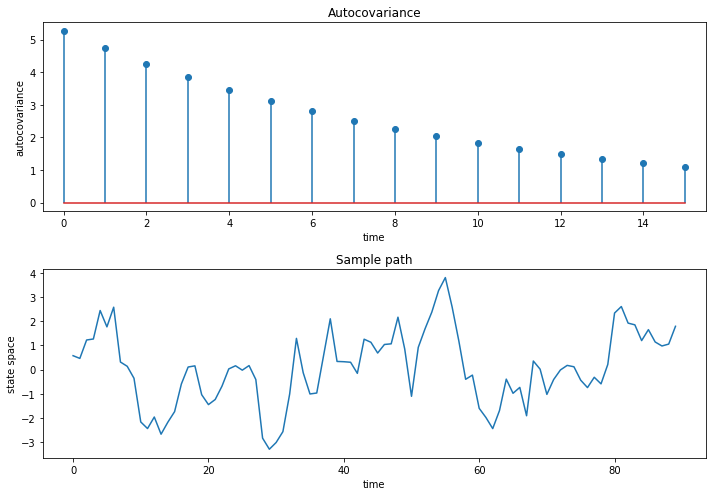

In [133]:
ϕ = 0.9
θ = 0.0
arma = qe.ARMA(ϕ, θ)
quad_plot(arma)

[0, 0.03381505078763313, 0.021225492417037698, 0.05090433807669677, 0.011945876504696452, -0.029794552646851966, 0.026703514106178033, 0.061373395924138985, 0.06321821629493272, 0.060871687180208814, 0.057120759943375836, 0.0013539576537609649, -0.10751719706515331, -0.020514211927607422, 0.02386655257530951, -0.009814167253914692, 0.04239034051837887, 0.03492364234828038, 0.2790580442953517, -0.16981921663881108, -0.0017335592479737058, 0.13402100012129528, 0.15450506365314565, 0.6030469945018266, -0.5799349334205565]


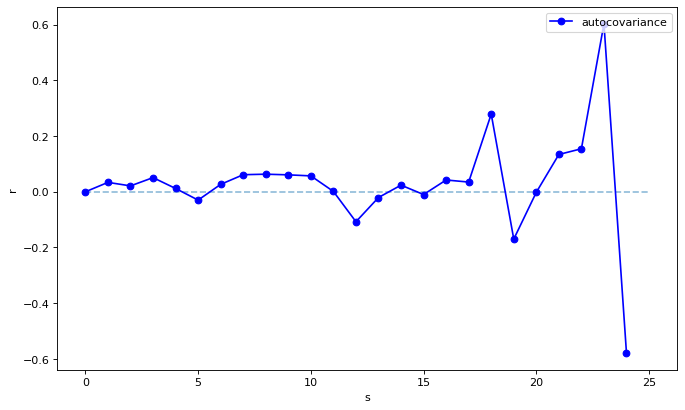

In [139]:
import random
figure(figsize=(10, 6), dpi=80)
x=np.zeros(25)
N=len(x)
r=[0]
for i in range(len(x)):
    x[i]+=random.gauss(0,1)
for s in range(0,N-1):
    for t in range(s+1,N):
        sum=x[t]*x[t-s]
    r.append(sum/(N-s))
    sum=0
print(r)
#plt.plot(x)
plt.plot(r,'bo-',label=f'autocovariance')
plt.legend(loc='upper right')
plt.xlabel("s")
plt.ylabel("r")
plt.hlines(0, 0, 25, linestyle='--', alpha=0.5)